# Chapter 9: Unsupervised Learning Techniques
Although most of the applications of machine learning today are based on
supervised learning (and as a result, this is where most of the investments go
to), the vast majority of the available data is unlabeled: we have the input
features X, but we do not have the labels y. The computer scientist Yann
LeCun famously said that “if intelligence was a cake, unsupervised learning
would be the cake, supervised learning would be the icing on the cake, and
reinforcement learning would be the cherry on the cake.” In other words,
there is a huge potential in unsupervised learning that we have only barely
started to sink our teeth into.

In this chapter we will look at a few more unsupervised tasks:
- Clustering
- Anomaly detection (also called outlier delection)
- Desity estimation

## Clustering Algorithms: K-means and DBSCAN
Just like in classification, each instance gets assigned to a group. However,
unlike classification, clustering is an unsupervised task.

Clustering is used in a wide variety of applications, including:
- Customer segmentation. For example, customer segmentation can be
useful in recommender systems to suggest content that other users in the
same cluster enjoyed.
- Data analysis.
- Dimensionality reduction. it is usually possible to measure each
instance’s affinity with each cluster; affinity is any measure of how well
an instance fits into a cluster. Each instance’s feature vector x can then be
replaced with the vector of its cluster affinities.
- Feature Engineering. The cluster affinities can often be useful as extra features.
- Outlier Detection. 
- Semi-supervised learning.
- Search engines.
- Image Segmentation.


### K-means
The k-means algorithm is a simple algorithm capable
of clustering this kind of dataset very quickly and efficiently, often in just a
few iterations.

The k-means algorithm is a simple algorithm capable
of clustering this kind of dataset very quickly and efficiently, often in just a
few iterations.

In the context of
clustering, an instance’s label is the index of the cluster to which the
algorithm assigns this instance; this is not to be confused with the class labels
in classification, which are used as targets (remember that clustering is an
unsupervised learning task). The KMeans instance preserves the predicted
labels of the instances it was trained on, available via the labels_ instance
variable.

Indeed, the k￾means algorithm does not behave very well when the blobs have very
different diameters because all it cares about when assigning an instance to a
cluster is the distance to the centroid.

Instead of assigning each instance to a single cluster, which is called hard
clustering, it can be useful to give each instance a score per cluster, which is
called soft clustering. The score can be the distance between the instance and
the centroid or a similarity score (or affinity), such as the Gaussian radial
basis function.

**The k-means algorithms**

So, how does the algorithm work? Well, suppose you were given the
centroids. You could easily label all the instances in the dataset by assigning
each of them to the cluster whose centroid is closest. Conversely, if you were
given all the instance labels, you could easily locate each cluster’s centroid
by computing the mean of the instances in that cluster. But you are given
neither the labels nor the centroids, so how can you proceed? Start by placing
the centroids randomly (e.g., by picking k instances at random from the
dataset and using their locations as centroids). Then label the instances,
update the centroids, label the instances, update the centroids, and so on until
the centroids stop moving.

Although the algorithm is guaranteed to converge, it may not converge to the
right solution (i.e., it may converge to a local optimum): whether it does or
not depends on the centroid initialization.

**Centroid initialization methods**

If you happen to know approximately where the centroids should be (e.g., if
you ran another clustering algorithm earlier), then you can set the init
hyperparameter to a NumPy array containing the list of centroids. Another solution is to run the algorithm multiple times with different random
initializations and keep the best solution. 


How exactly
does it know which solution is the best? It uses a performance metric! That
metric is called the model’s inertia, which is the sum of the squared distances
between the instances and their closest centroids.

**Finding the optimal number of clusters**

In general, It won't be easy to know how to set k, and the results might be quite bad if you set it the wrong value.

You might be thinking that you could just pick the model with the lowest
inertia. Unfortunately, it is not that simple. The inertia for k=3 is about 653.2,
which is much higher than for k=5 (211.6). But with k=8, the inertia is just
119.1. The inertia is not a good performance metric when trying to choose k
because it keeps getting lower as we increase k. Indeed, the more clusters
there are, the closer each instance will be to its closest centroid, and therefore
the lower the inertia will be.

Let’s plot the inertia as a function of k.
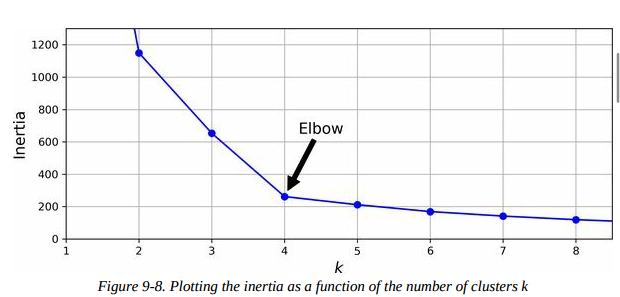 
When we
do this, the curve often contains an inflexion point called the elbow. As you can see, the inertia drops very quickly as we increase k up to 4, but
then it decreases much more slowly as we keep increasing k. This curve has
roughly the shape of an arm, and there is an elbow at k = 4. So, if we did not
know better, we might think 4 was a good choice.

This technique for choosing the best value for the number of clusters is rather
coarse. A more precise (but also more computationally expensive) approach
is to use the silhouette score, which is the mean silhouette coefficient over all
the instances. An instance’s silhouette coefficient is equal to (b – a) / max(a,
b), where a is the mean distance to the other instances in the same cluster
(i.e., the mean intra-cluster distance) and b is the mean nearest-cluster
distance (i.e., the mean distance to the instances of the next closest cluster,
defined as the one that minimizes b, excluding the instance’s own cluster).
The silhouette coefficient can vary between –1 and +1. A coefficient close to
+1 means that the instance is well inside its own cluster and far from other
clusters, while a coefficient close to 0 means that it is close to a cluster
boundary; finally, a coefficient close to –1 means that the instance may have
been assigned to the wrong cluster.


### Limits of k-means

As we saw, it is necessary to run the algorithm several times to avoid
suboptimal solutions, plus you need to specify the number of clusters, which
can be quite a hassle. Moreover, k-means does not behave very well when the
clusters have varying sizes, different densities, or nonspherical shapes

### DBSCAN

The density-based spatial clustering of applications with noise (DBSCAN)
algorithm defines clusters as continuous regions of high density. Here is how
it works:
- For each instance, the algorithm counts how many instances are located
within a small distance ε (epsilon) from it. This region is called the
instance’s ε-neighborhood.
- If an instance has at least min_samples instances in its ε-neighborhood
(including itself), then it is considered a core instance. In other words,
core instances are those that are located in dense regions.
- All instances in the neighborhood of a core instance belong to the same
cluster. This neighborhood may include other core instances; therefore, a
long sequence of neighboring core instances forms a single cluster.
- Any instance that is not a core instance and does not have one in its
neighborhood is considered an anomaly

Surprisingly, the DBSCAN class does not have a predict() method, although
it has a fit_predict() method. In other words, it cannot predict which cluster a
new instance belongs to. This decision was made because different
classification algorithms can be better for different tasks, so the authors
decided to let the user choose which one to use. Moreover, it’s not hard to
implement. For example, let’s train a KNeighborsClassifier.

In short, DBSCAN is a very simple yet powerful algorithm capable of
identifying any number of clusters of any shape. It is robust to outliers, and it
has just two hyperparameters (eps and min_samples). If the density varies
significantly across the clusters, however, or if there’s no sufficiently low￾density region around some clusters, DBSCAN can struggle to capture all the
clusters properly. Moreover, its computational complexity is roughly O(m n),
so it does not scale well to large datasets.


## Gausian Mixtures
A Gaussian mixture model (GMM) is a probabilistic model that assumes that
the instances were generated from a mixture of several Gaussian distributions
whose parameters are unknown. When you observe an instance, you know
it was generated from one of the Gaussian distributions, but you are not told
which one, and you do not know what the parameters of these distributions
are.


There are several GMM variants. In the simplest variant, implemented in the
GaussianMixture class, you must know in advance the number k of Gaussian
distributions. The dataset X is assumed to have been generated through the
following probabilistic process:
- For each instance, a cluster is picked random from among k clusters. The probability of choosing the $j^th$ cluster is the cluster’s weight $\phi^(j)$. The index of the cluster chosen for the $i^th$ instance is noted $z^(i)$.
- If the $i^th$ instance was assigned to the $j^th$ cluster, then the location $\bold{x}^(i)$ of this instance is sampled randomly from the Gaussian distribution with the mean $\mu^(j)$ and covariance matrix $\sum^(j)$. 

### Using Gaussian Mixtures for Anomaly Detection

Using a Gaussian mixture model for anomaly detection is quite simple: any
instance located in a low-density region can be considered an anomaly. You
must define what density threshold you want to use. For example, in a
manufacturing company that tries to detect defective products, the ratio of
defective products is usually well known. Say it is equal to 2%. If you notice that you get too many false positives, you can lower the threshold. Conversely, if you have too many false nagatives, you can increase the threshold. This is the usual precision/recall trade-off.

A closely related task is novelty detection: it differs from anomayly detiection in that the algorithm is assumed to be trained on a "clean" dataset, uncontaminated by outliers, whereas anomaly detection does not make this assumption. Indeed, outlier detection is often used to clean up a dataset.

### Selecting the Number of Clusters

You can try to find the model that minimizeds a theoretical information criterion, such as the **Bayesian information criterion** (BIC) or the **Akaike information criterion** (AIC).

Both BIC and AIC penalize models that have more parameters to learn and reward models that fit the data well. They often end up selecting the same model. When they differ, the model selected  by the BIC tends to be simpler (fewer parameters) than the one selected by AIC, but tends to not fit the data quite as  well.

